# Modulo pysam per formato SAM/BAM

`pysam` è il modulo Python che mette a disposizione le funzionalità per manipolare file in formato SAM/BAM.

Importare il modulo `pysam`

In [1]:
import pysam

## 1) Leggere gli allineamenti da un file `SAM/BAM`

La classe `AlignmentFile` è la classe che rappresenta un set di allineamenti di *queries* (sequenze corte) a *references* (sequenze lunghe).

Un oggetto di tipo `AlignmentFile` è ottenuto a partire da un file SAM/BAM nel seguente modo: 

    sam_file = AlignmentFile(sam_file_name, 'r')
    bam_file = AlignmentFile(bam_file_name, 'rb')

Importare la classe `AlignmentFile`.

In [2]:
from pysam import AlignmentFile

https://pysam.readthedocs.io/en/latest/api.html

### Costruire l'oggetto `AlignmentFile` a partire dal file `sample.bam`

Indicizzare il file `sample.bam` tramite la funzione `index()`.

In [3]:
pysam.index('./sample.bam')

''

Costruire l'oggetto `AlignmentFile` a partire dal file `sample.bam`.

In [51]:
bam_file = AlignmentFile('./sample.bam', 'rb')

`bam_file` contiene l'oggetto che rappresenta tutti gli allineamenti presenti nel file di BAM in input.

Il numero di reads mappati e non mappati si ottiene accedendo a `mapped` e `unmapped`.

In [52]:
bam_file.mapped

25008

In [53]:
bam_file.unmapped

0

Le references coinvolte nel file BAM si ottengono accedendo a `references`.

In [54]:
bam_file.references

('X',)

Il numero di references coinvolte nel file BAM si ottengono accedendo a `nreferences`.

In [55]:
bam_file.nreferences

1

La lunghezza delle references coinvolte nel file BAM si ottengono accedendo a `lengths`.

In [56]:
bam_file.lengths

(23542271,)

La lunghezza di una reference in particolare si ottiene con il metodo `get_reference_length()`.

In [57]:
bam_file.get_reference_length('X')

23542271

Il numero di queries (reads) mappati a una determinata regione della reference si ottiene con il metodo `count()`

In [58]:
bam_file.count('X', 280000, 300000)

25008

## 2) Estrarre allineamenti da un oggetto `AlignmentFile`

Il metodo `fetch()` invocato nei tre seguenti modi: 

    bam_file.fetch()
    bam_file.fetch(ref_name)
    bam_file.fetch(ref_name, start_region, end_region)
    
restituisce un iteratore contenente (rispettivamente):

- tutti gli allineamenti del SAM/BAM file
- tutti gli allineamenti che si riferiscono alla reference `ref_name`
- tutti gli allineamenti che si riferiscono alla sottoregione tra le posizioni `start_region` e `end_region`della reference `ref_name`.

Un singolo allineamento tra query e reference è un oggetto di tipo `AlignedSegment`.

---
    
Estrarre tutti gli allineamenti del BAM file.

In [59]:
all_alignments = bam_file.fetch()

Il numero di allineamenti estratti è:

In [60]:
all_alignments = list(all_alignments)

In [61]:
len(all_alignments)

25008

Estrarre gli allineamenti relativi alla reference `X`.

In [62]:
x_alignments = bam_file.fetch('X')

In [63]:
len(list(x_alignments))

25008

Estrarre gli allineamenti relativi alla reference `X` che cadono nella regione tra le posizioni `280000` e `285000`.

In [64]:
x_region_alignments = bam_file.fetch('X', 280000, 285000)

In [65]:
len(list(x_region_alignments))

3170

L'istruzione:

    bam_file.head(n)

restituisce i primi `n` allineamenti del BAM file.

---

Si estraggano i primi 1000 allineamenti.

In [66]:
first_alignments = list(bam_file.head(1000))

In [67]:
len(first_alignments)

1000

## 3) Accedere alle informazioni di un allineamento

Estrarre il primo allineamento della lista `all_alignments`.

In [68]:
first_alignment = all_alignments[0]
first_alignment

Gli oggetti `AlignedSegment` hanno una serie di attributi che descrivono l'allineamento.

In [69]:
first_alignment.cigarstring

'100M'

In [70]:
first_alignment.cigartuples

[(0, 100)]

In [71]:
first_alignment.flag

0

In [72]:
first_alignment.is_paired

False

In [73]:
first_alignment.is_reverse

False

In [74]:
first_alignment.is_secondary

False

In [75]:
first_alignment.mapping_quality

255

In [76]:
first_alignment.reference_start

283185

In [77]:
first_alignment.query_name

'FBtr0300326_e_2967_X_283185'

In [78]:
first_alignment.query_alignment_sequence

'GCCCTTGCATTTATTTCCAGTTTTGGTTTTTTTTTTGTATTTATCAATTACATTTATAATTAATTATACACCATGTATATATATGTATTTATATACTATA'

Gli oggetti `AlignedSegment` hanno una serie di metodi tra i quali:

In [79]:
first_alignment.get_forward_sequence()

'GCCCTTGCATTTATTTCCAGTTTTGGTTTTTTTTTTGTATTTATCAATTACATTTATAATTAATTATACACCATGTATATATATGTATTTATATACTATA'

In [80]:
first_alignment.to_string()

'FBtr0300326_e_2967_X_283185\t0\tX\t283186\t255\t100M\t*\t0\t0\tGCCCTTGCATTTATTTCCAGTTTTGGTTTTTTTTTTGTATTTATCAATTACATTTATAATTAATTATACACCATGTATATATATGTATTTATATACTATA\t####################################################################################################\tNH:i:1\tHI:i:1\tAS:i:98\tnM:i:0'

## 4) Qualche metodo di `AlignmentFile`

- `find_introns()` restituisce in un oggetto `Counter` gli introni supportati dagli allineamenti passati come argomento e, per ogni introne, il numero di queries allineate

       bam_file.find_introns(alignment_iterator)
       
Le chiavi sono le tuple *(start, end)* degli introni e i valori sono il supporto come numero di queries. Il valore di *end* è la posizione della base del reference immediatamente successiva alla fine dell'introne.

Estrarre gli introni supportati dagli allineamenti del file in input:

In [81]:
bam_file.find_introns(bam_file.fetch())

Counter({(286891, 286948): 1255,
         (287041, 287328): 794,
         (287041, 289040): 468,
         (287526, 289040): 707,
         (289272, 289870): 530,
         (289272, 290252): 730,
         (289943, 290252): 593,
         (290596, 294712): 741,
         (290596, 294822): 586})

- `pileup()`, restituisce un iteratore contenente un oggetto `PileupColumn` per ognuna delle basi coperte dagli allineamenti che cadono nella regione specificata come *argomento* (se l'argomento non viene specificato allora vengono considerati tutti gli allineamenti presenti nel BAM file).

       bam_file.pileup()
       bam_file.pileup(ref_name)
       bam_file.pileup(ref_name, start_region, end_region)

Ogni base della reference coperta da allineamenti viene chiamata *pileup column*.

---

Trovare tutte le basi della reference coperte dagli allineamenti presenti nel BAM file.

In [82]:
pileup_iter = bam_file.pileup()

In [83]:
pileup_columns = list(pileup_iter)

Gli allineamenti presenti nel BAM file coprono un totale di:

In [84]:
len(pileup_columns)

11777

- accedere alla posizione sulla reference

In [85]:
pileup_columns[999].pos

284184

- estrarre il numero di allineamenti (queries o reads) che coprono la base.

In [86]:
pileup_columns[100].nsegments

169

- ottenere gli identificatori delle queries (reads) che coprono la base.

In [87]:
pileup_columns[999].get_query_names()

[]

- estrarre la lista delle queries (reads) che coprono la base.

In [88]:
pileup_columns[999].pileups

[]

Per il primo oggetto `PileupRead`, accedere alla posizione sul read che corrisponde alla base di pileup sulla *reference*.

In [89]:
# pileup_columns[999].pileups[0].query_position

In [94]:
covs = []
skips = []

for pileupcolumn in bam_file.pileup(min_base_quality = 0):
    cov = pileupcolumn.nsegments
    skipcount = 0
    for pileupread in pileupcolumn.pileups:
        skipcount += pileupread.is_refskip
    covs.append(cov)
    skips.append(skipcount)

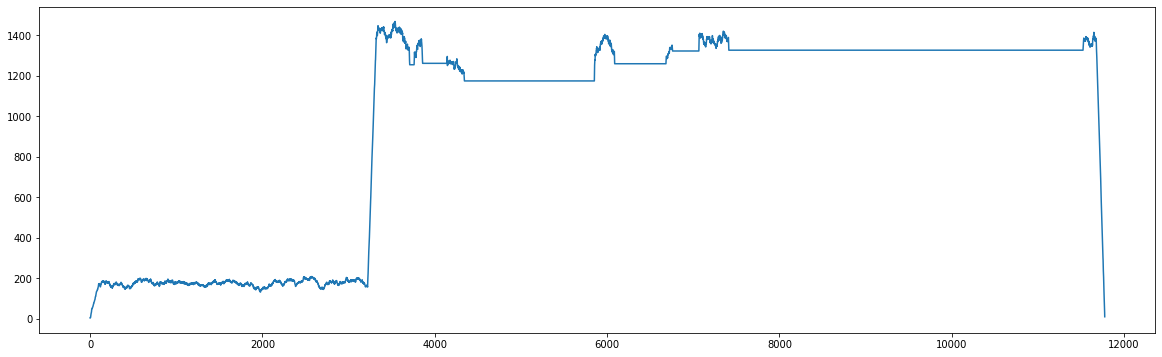

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,6))
plt.plot(range(len(covs)), covs)

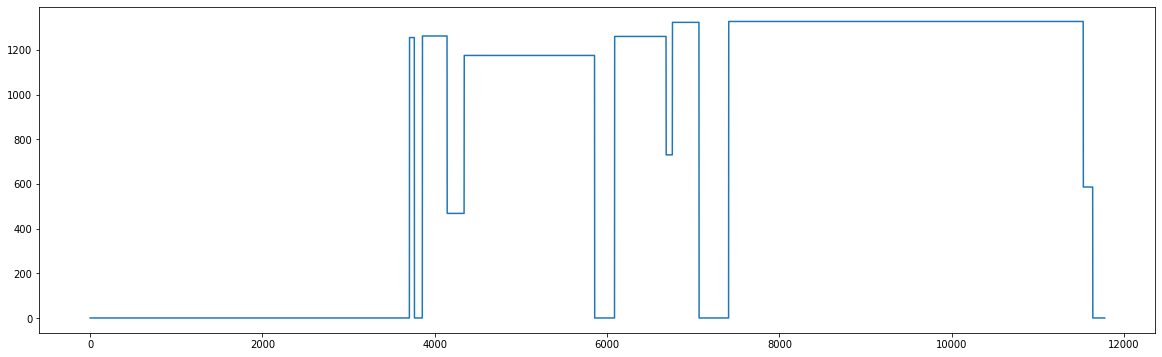

In [105]:
fig = plt.figure(figsize = (20,6))
plt.plot(range(len(skips)), skips)

In [106]:
print(bam_file.get_reference_length('X'))
print(len(covs))
print(len(skips))

23542271
11777
11777


In [116]:
refpos = [pileupcolumn.reference_pos for pileupcolumn in bam_file.pileup(min_base_quality = 0)]
print(len(refpos))

11777


Stiamo saltando posizioni?

In [119]:
for i in range(1, len(refpos)):
    if not refpos[i] - refpos[i-1] == 1:
        print("skip")